In [95]:
!pip install fasteda

In [96]:
!pip install datacleaner

In [104]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


import numpy as np

from sklearn.preprocessing import QuantileTransformer
from fasteda import fast_eda
from datacleaner import autoclean

import scipy
import scipy.stats as stats

In [105]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML_Project/Melbourne_housing_FULL.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [107]:
df.shape

(34857, 21)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [109]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [110]:
df.value_counts()

Suburb        Address             Rooms  Type  Price      Method  SellerG        Date        Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  CouncilArea               Lattitude  Longtitude  Regionname             Propertycount
Abbotsford    1/43 Abbotsford St  2      u     505000.0   PI      Nelson         27/05/2017  3.0       3067.0    2.0       1.0       1.0  0.0       38.0          1970.0     Yarra City Council        -37.80206  145.00015   Northern Metropolitan  4019.0           1
Newport       3 River St          3      h     1210000.0  SP      Williams       6/08/2016   8.4       3015.0    3.0       1.0       1.0  546.0     144.0         1920.0     Hobsons Bay City Council  -37.84140  144.89200   Western Metropolitan   5498.0           1
              26 Croker St        4      t     930000.0   PI      Greg           26/07/2016  8.4       3015.0    4.0       3.0       3.0  278.0     188.0         2009.0     Hobsons Bay City Council  -37.84680  144

In [111]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [112]:
df.isnull().sum() / len(df) * 100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [113]:
df.drop(["Car", "Landsize", "BuildingArea", "YearBuilt"], axis = 1, inplace = True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [114]:
df = autoclean(df)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,870000.0,6,155,58,2.5,3067.0,2.0,1.0,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,2.0,1.0,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,2.0,1.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,870000.0,7,296,63,2.5,3067.0,3.0,2.0,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,64,2.5,3067.0,3.0,2.0,31,-37.8093,144.9944,2,4019.0


In [115]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

DataFrame Head:


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,870000.0,6,155,58,2.5,3067.0,2.0,1.0,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,2.0,1.0,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,2.0,1.0,31,-37.8079,144.9934,2,4019.0


DataFrame Tail:


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34854,348,7350,2,1,705000.0,2,152,38,6.3,3013.0,2.0,1.0,16,-37.82286,144.87856,6,6543.0
34855,348,5421,3,0,1140000.0,5,370,38,6.3,3013.0,3.0,2.0,16,-37.80760,145.00780,6,6543.0
34856,348,17743,2,0,1020000.0,0,276,38,6.3,3013.0,2.0,1.0,16,-37.81810,144.89351,6,6543.0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(34857, 17)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  int64  
 1   Address        34857 non-null  int64  
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  int64  
 4   Price          34857 non-null  float64
 5   Method         34857 non-null  int64  
 6   SellerG        34857 non-null  int64  
 7   Date           34857 non-null  int64  
 8   Distance       34857 non-null  float64
 9   Postcode       34857 non-null  float64
 10  Bedroom2       34857 non-null  float64
 11  Bathroom       34857 non-null  float64
 12  CouncilArea    34

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Suburb,34857,171.576,171,100.542,0,78,171,261,350,-0.069747,-1.242106
Address,34857,17002.386,16983,9812.989,0,8503,16983,25498,34008,0.001466,-1.199314
Rooms,34857,3.031,3,0.97,1,2,3,4,16,0.499075,2.511176
Type,34857,0.521,0,0.817,0,0,0,1,2,1.080999,-0.633151
Price,34857,1010837.798,870000,571999.151,85000,695000,870000,1150000,11200000,3.053873,17.712170
Method,34857,2.713,2,1.989,0,2,2,4,8,0.838628,-0.059757
SellerG,34857,184.633,198,110.28,0,101,198,275,387,0.111466,-1.036206
Date,34857,39.133,39,21.875,0,21,39,57,77,0.051821,-1.091268
Distance,34857,11.185,10.3,6.789,0,6.4,10.3,14,48.1,1.503553,3.585443
Postcode,34857,3116.062,3103,109.022,3000,3051,3103,3156,3978,4.018678,22.781071


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



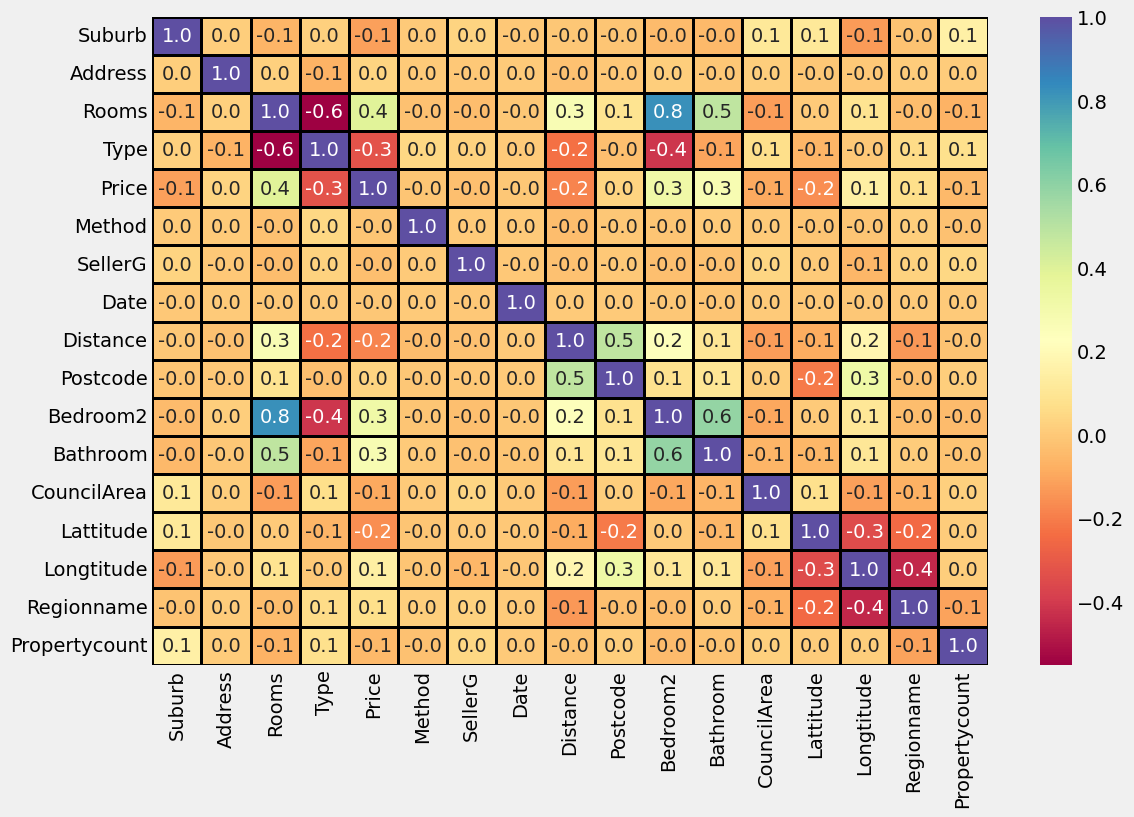

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



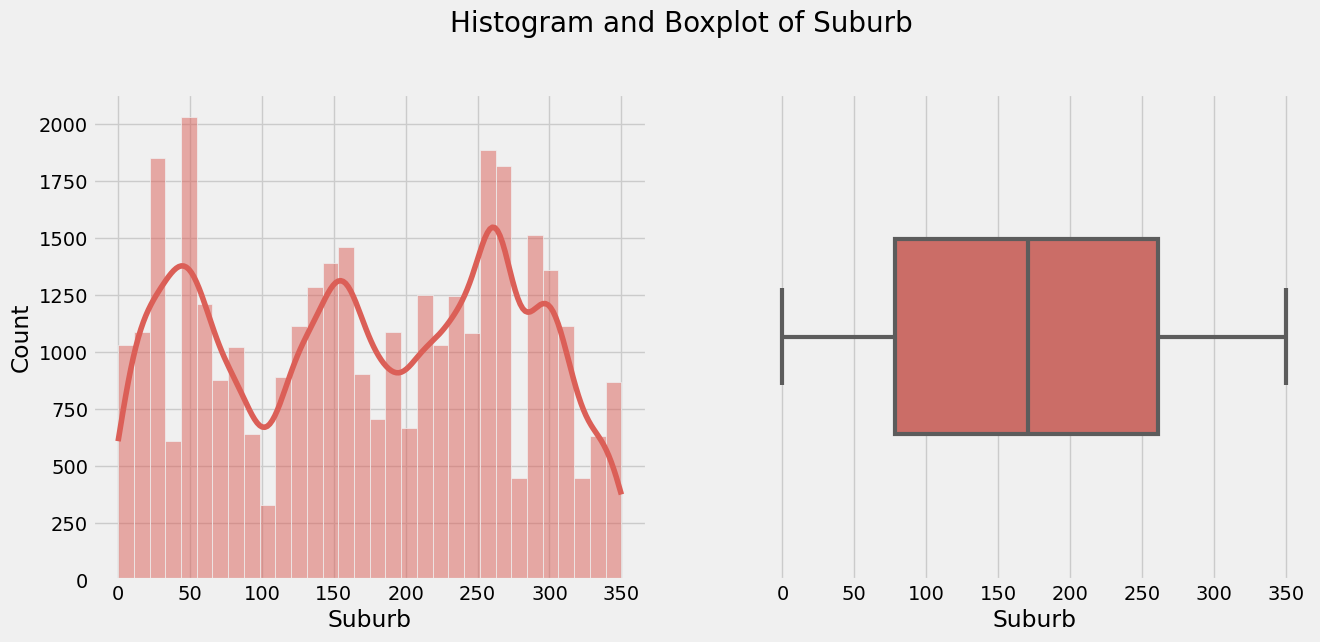

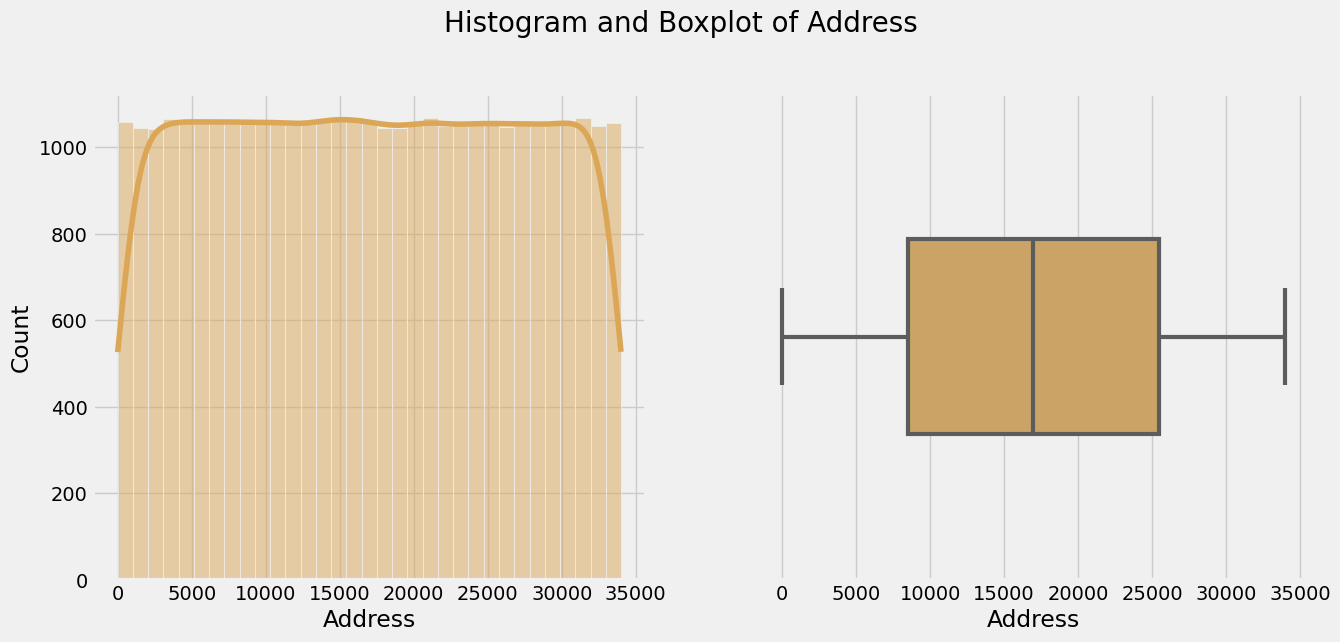

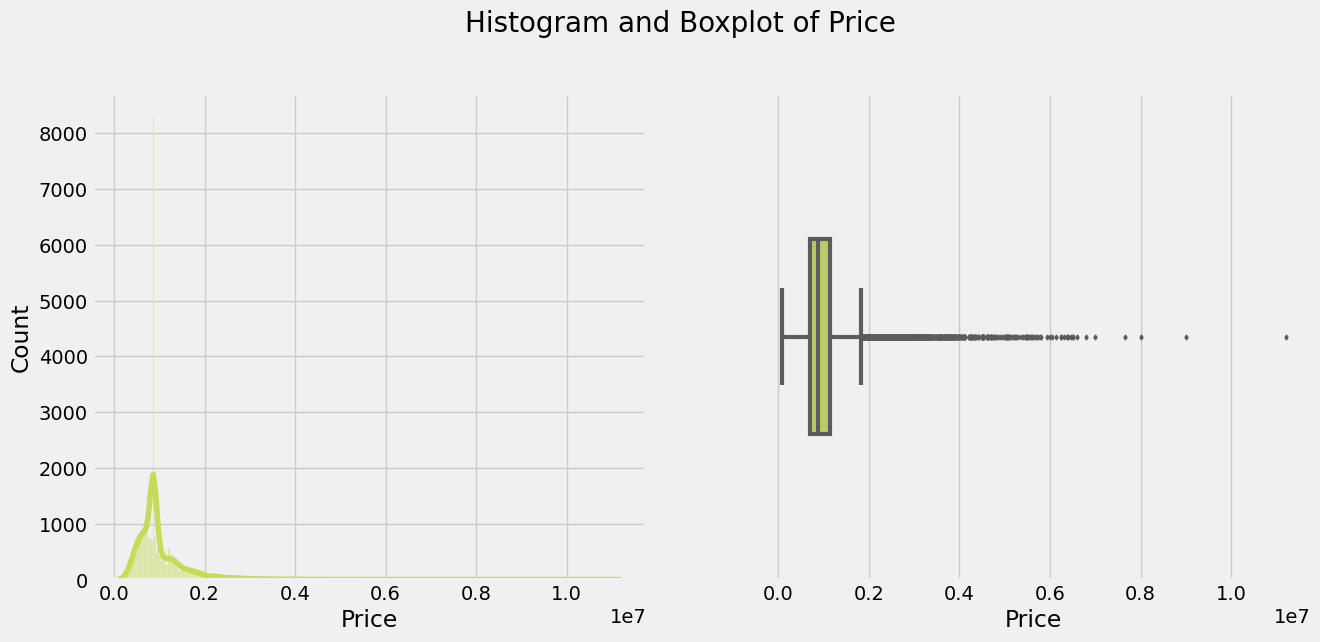

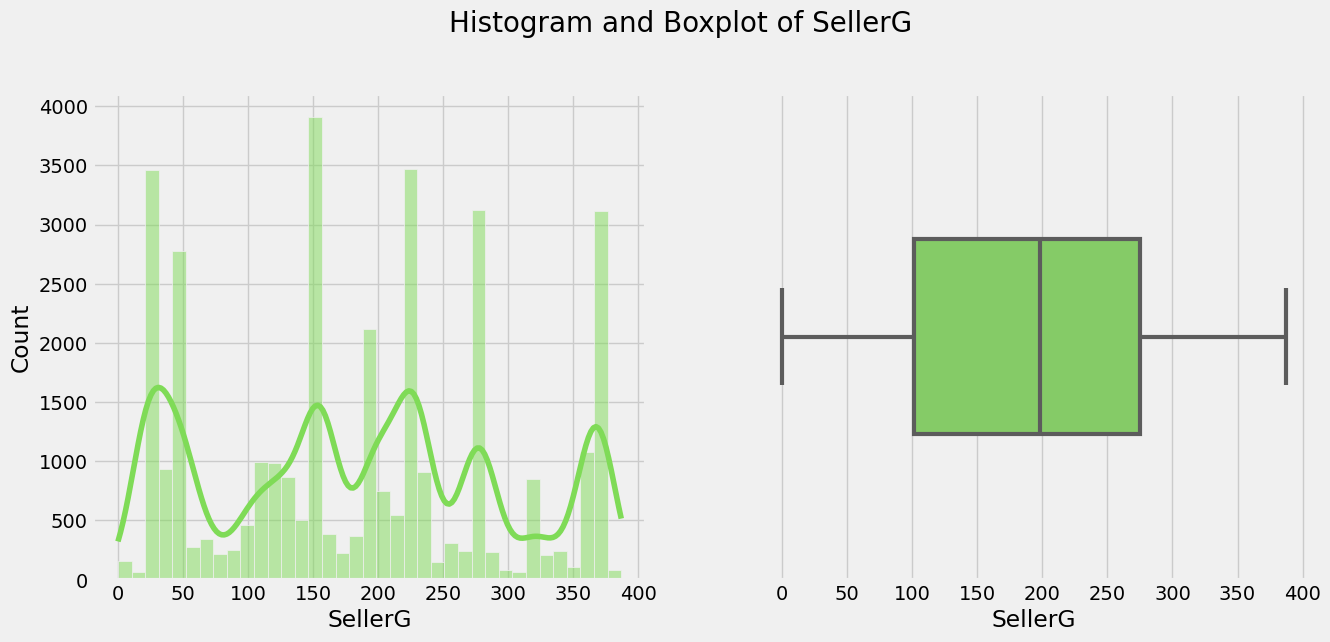

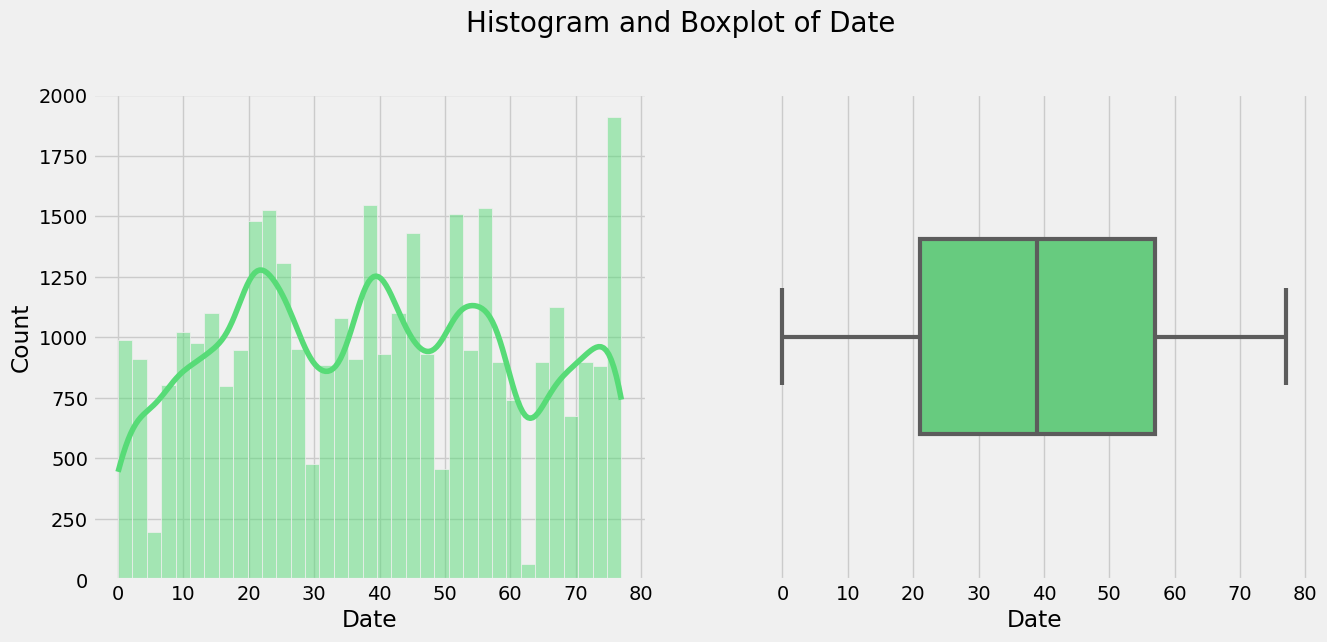

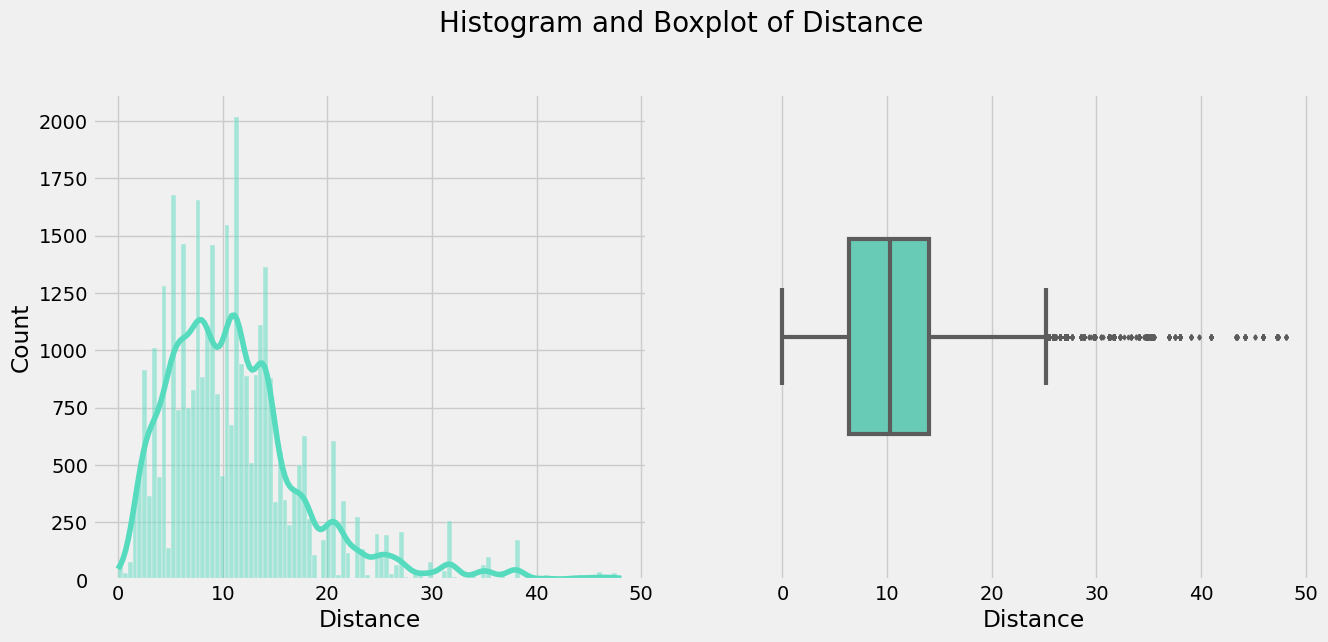

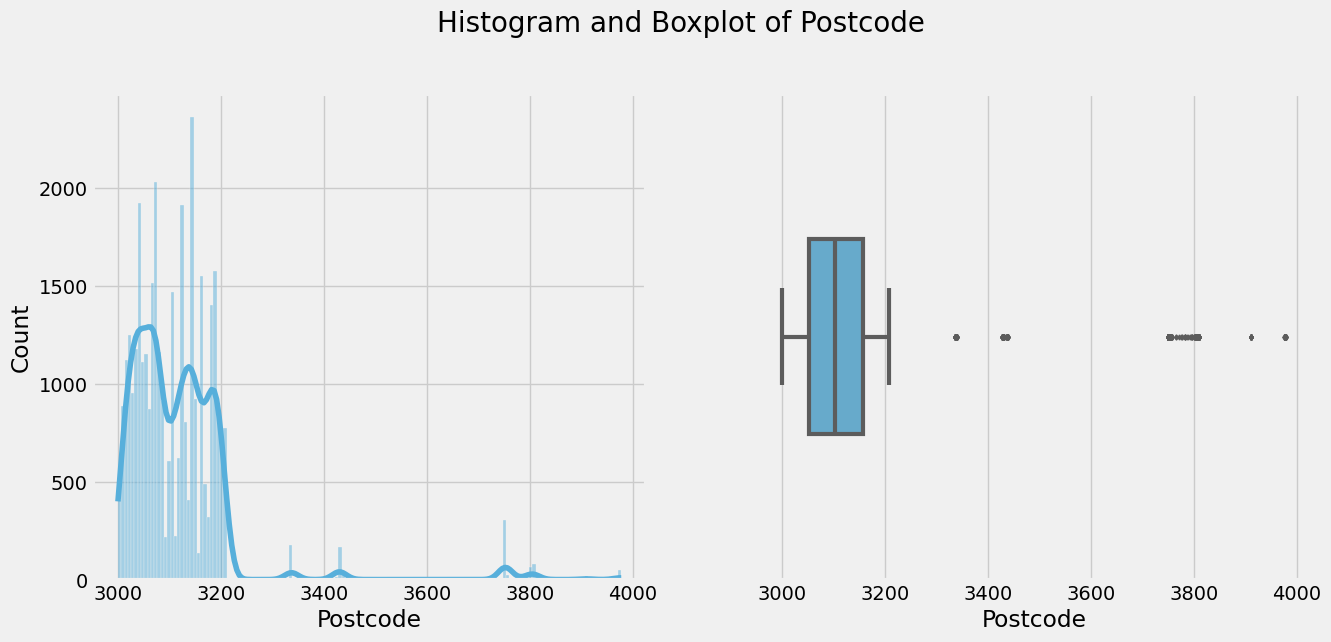

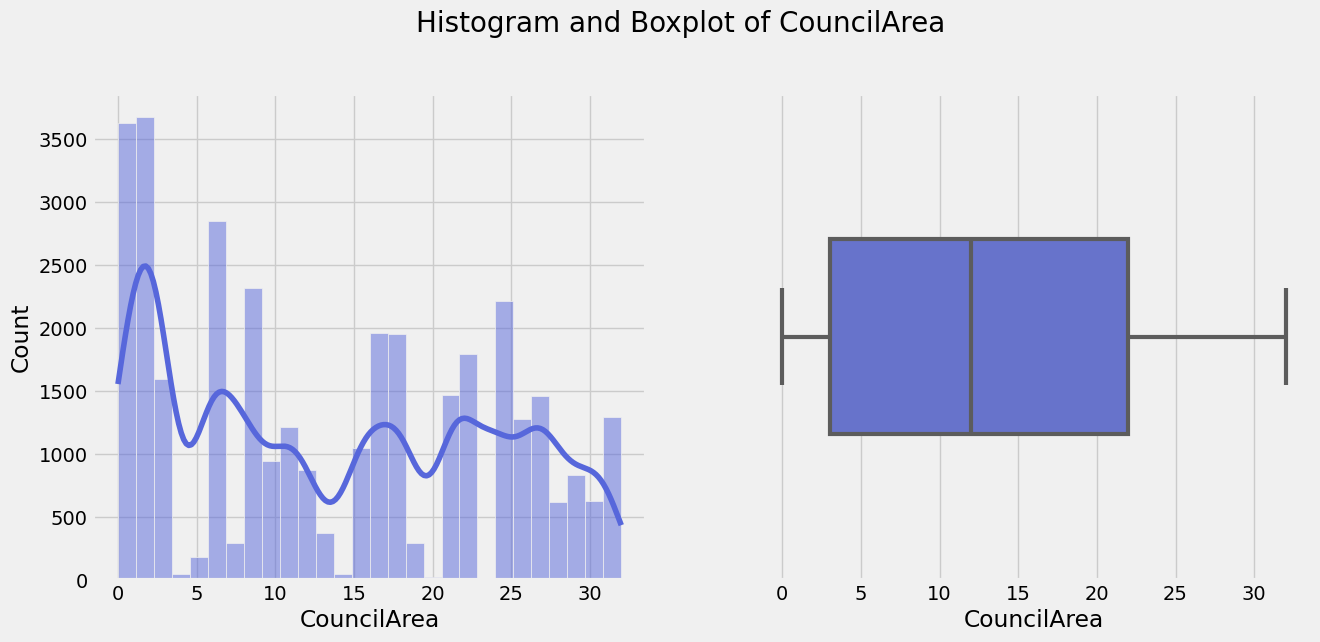

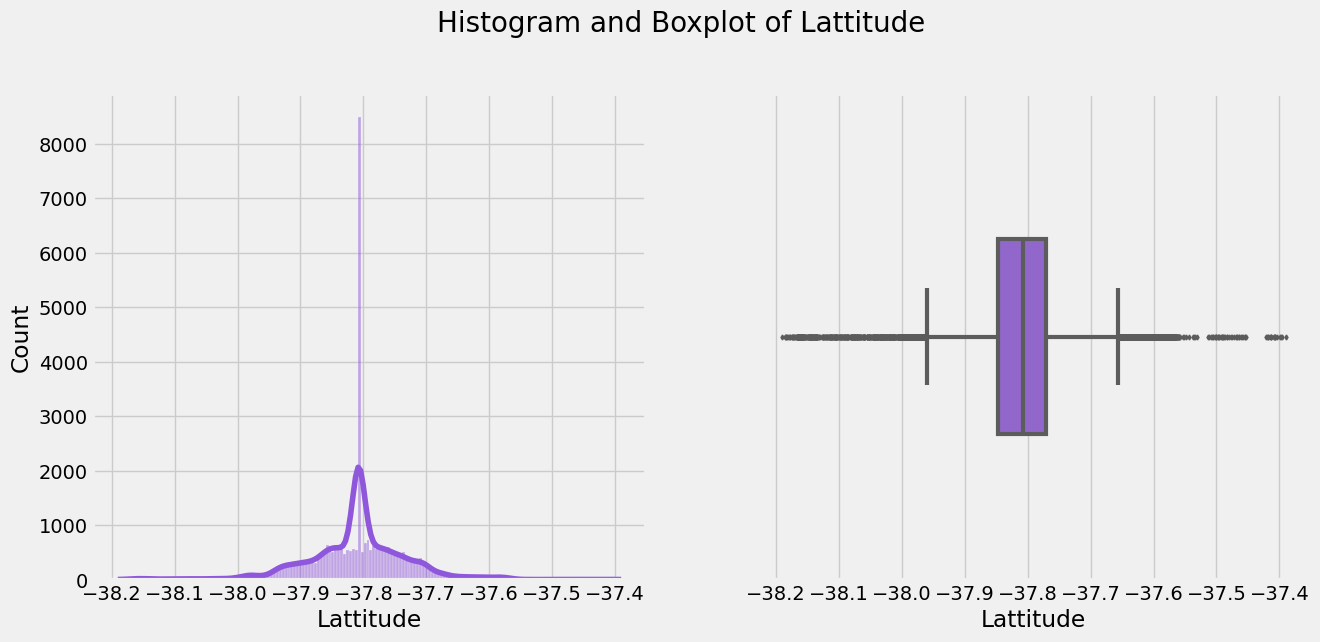

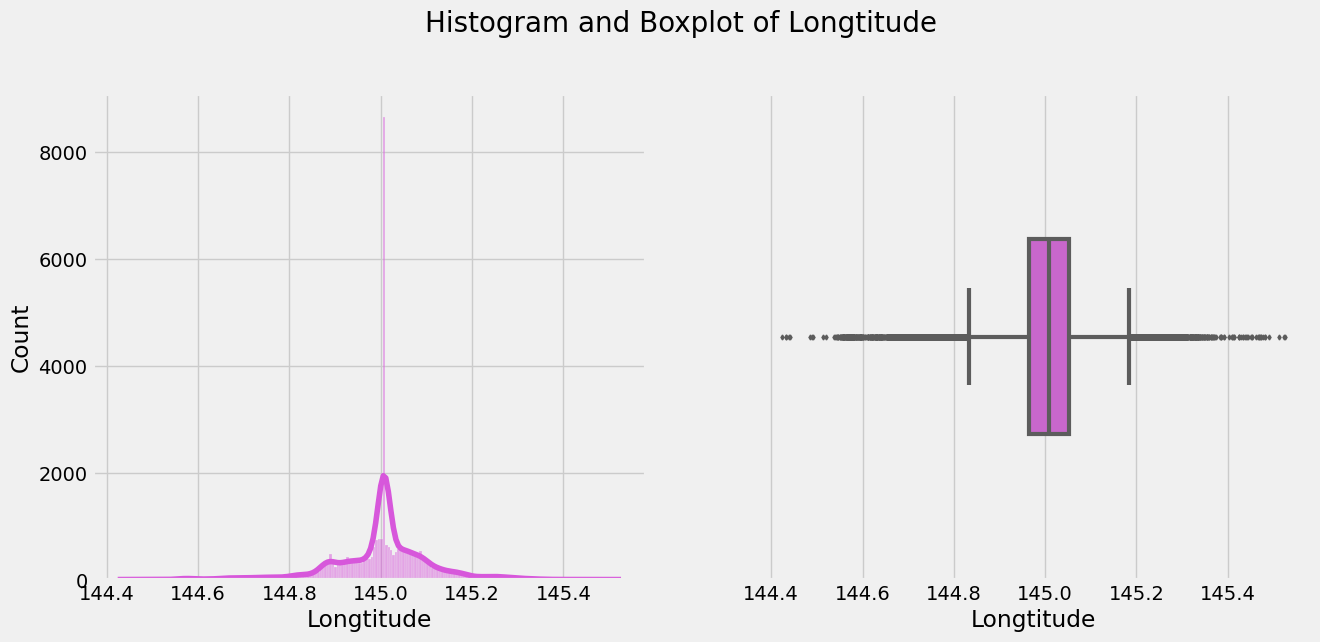

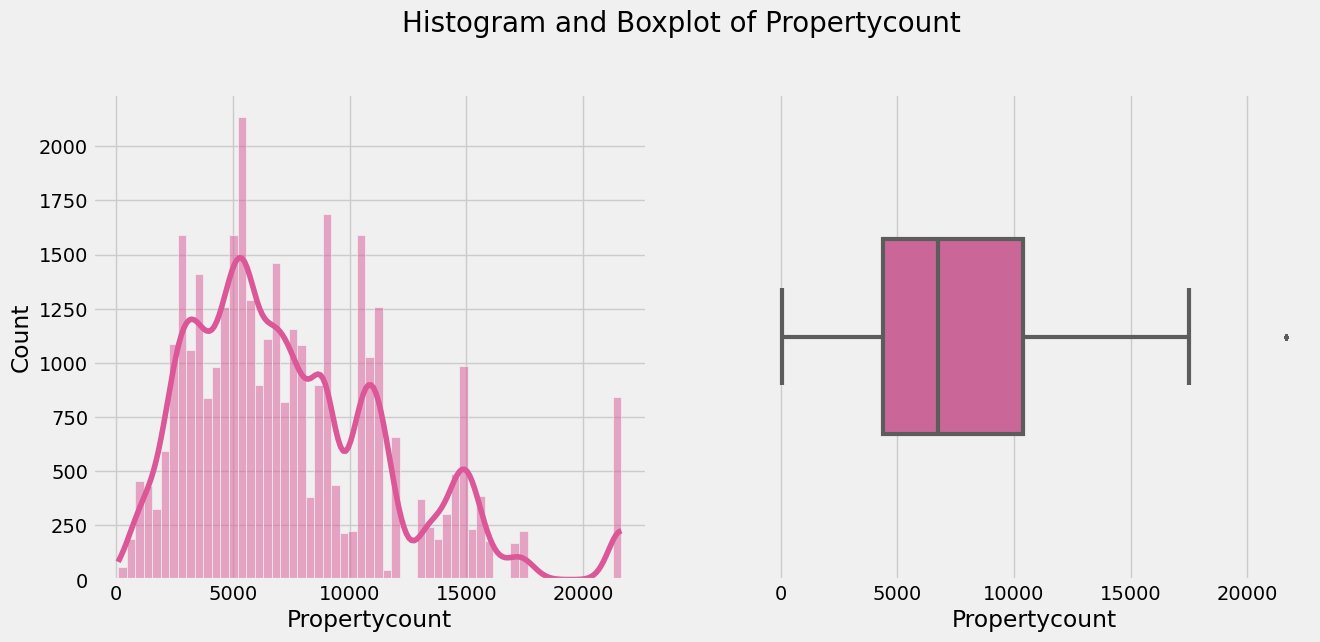

----------------------------------------------------------------------------------------------------
Countplot(s):



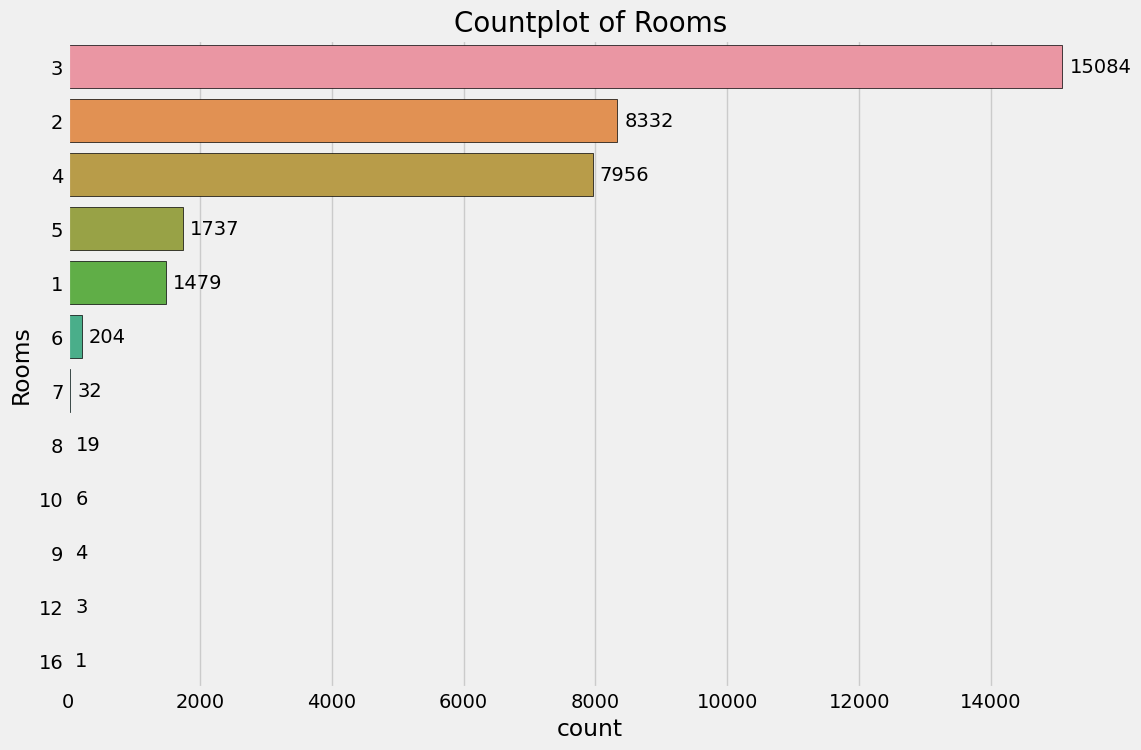

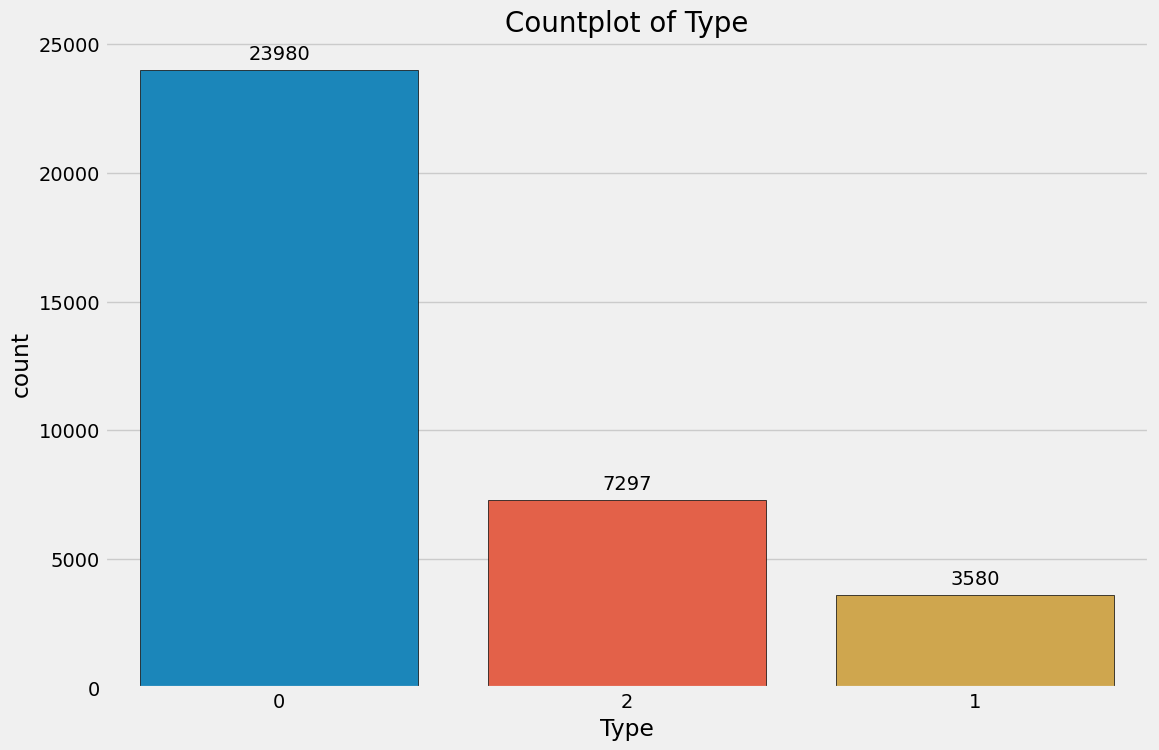

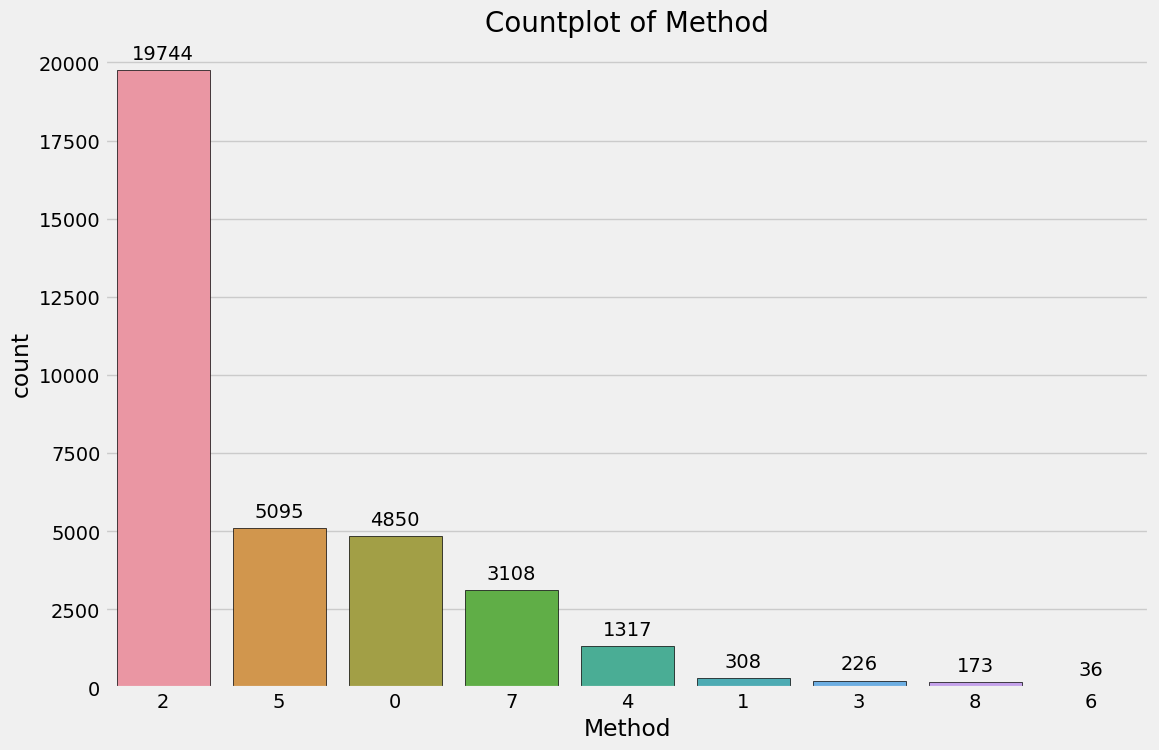

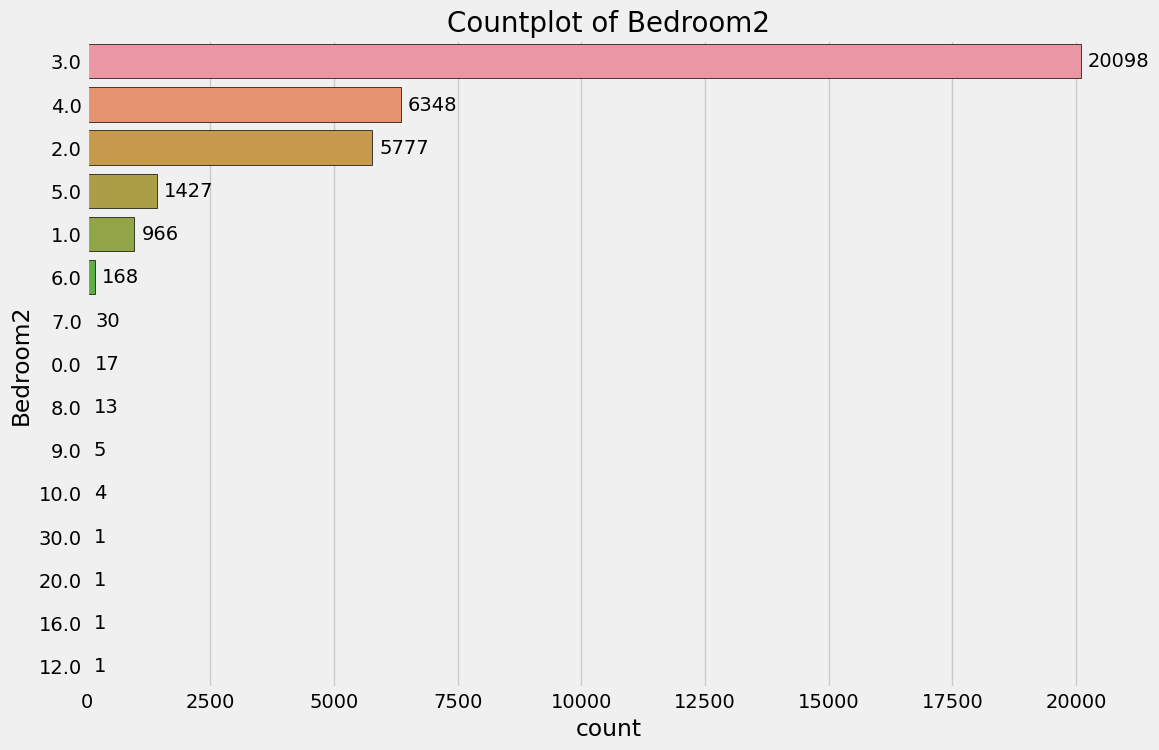

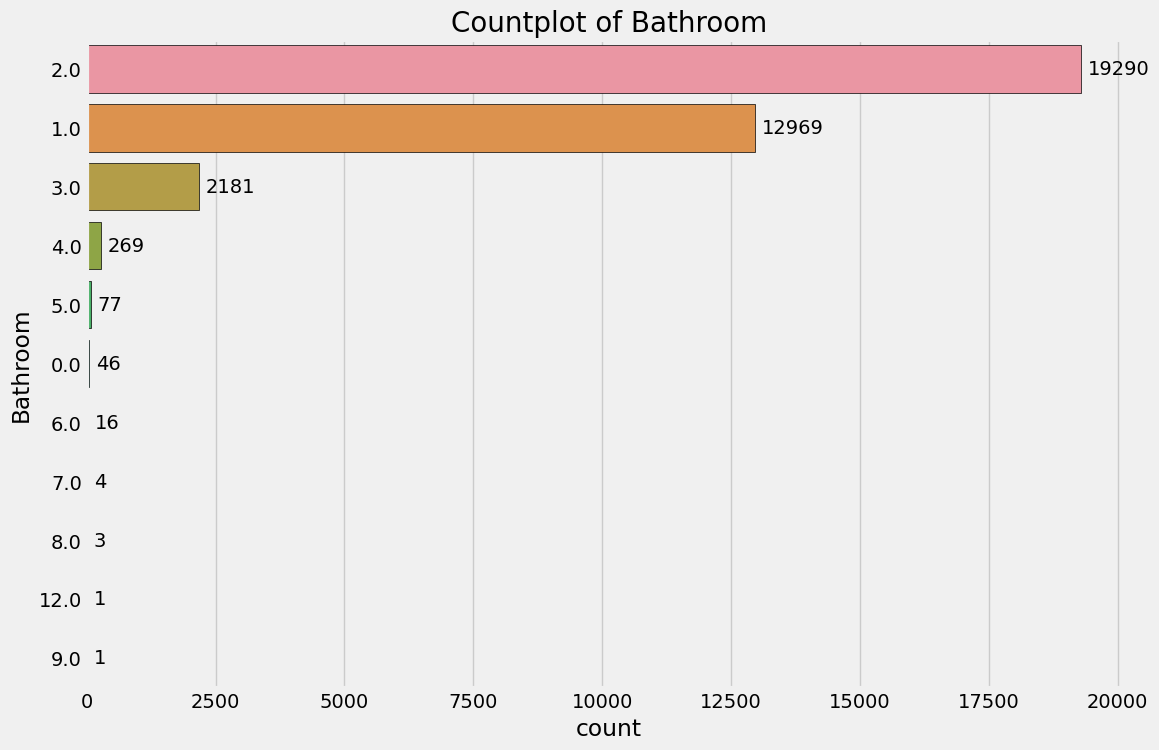

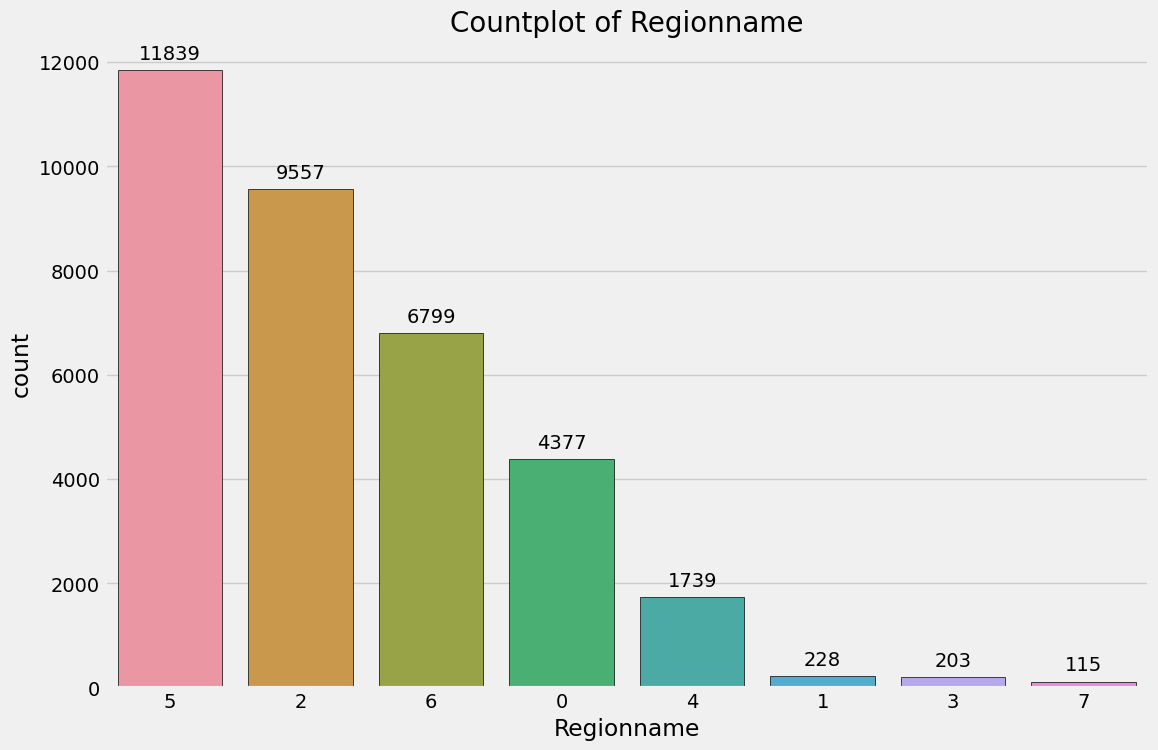

In [116]:
fast_eda(df)

In [117]:
qt = QuantileTransformer(output_distribution='normal')

for col in df.columns:
    df[col] = df[col] = qt.fit_transform(pd.DataFrame(df[col]))

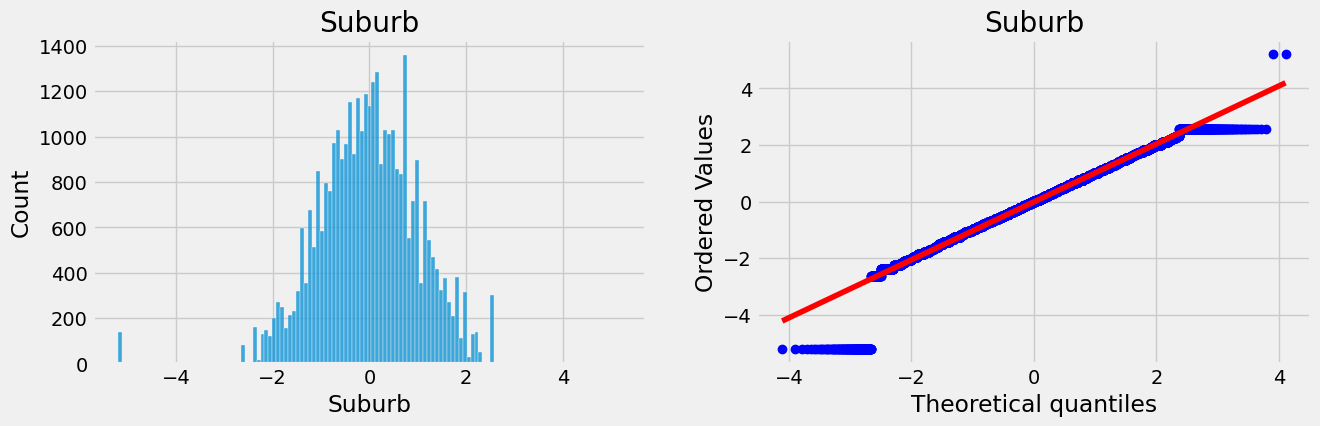

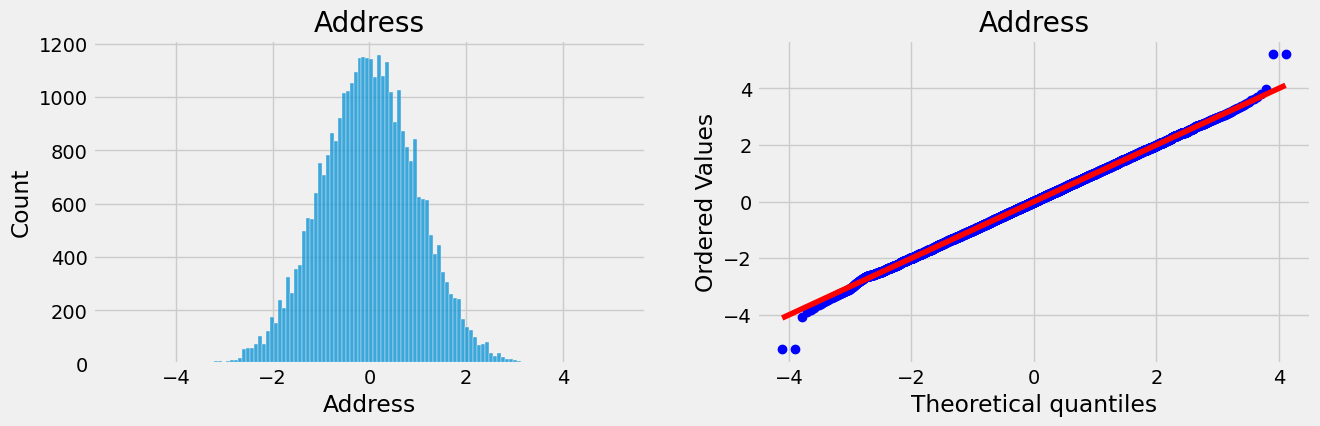

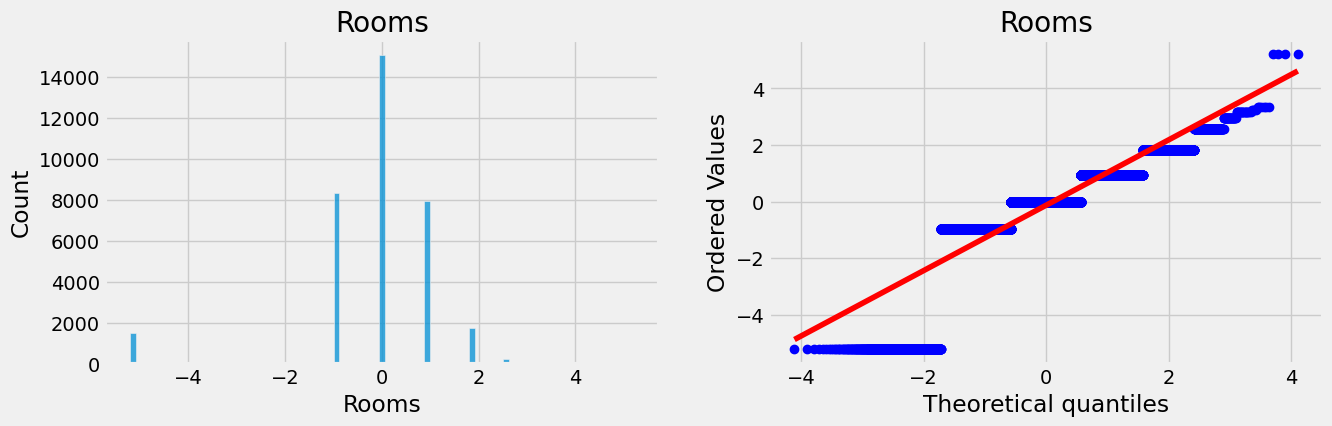

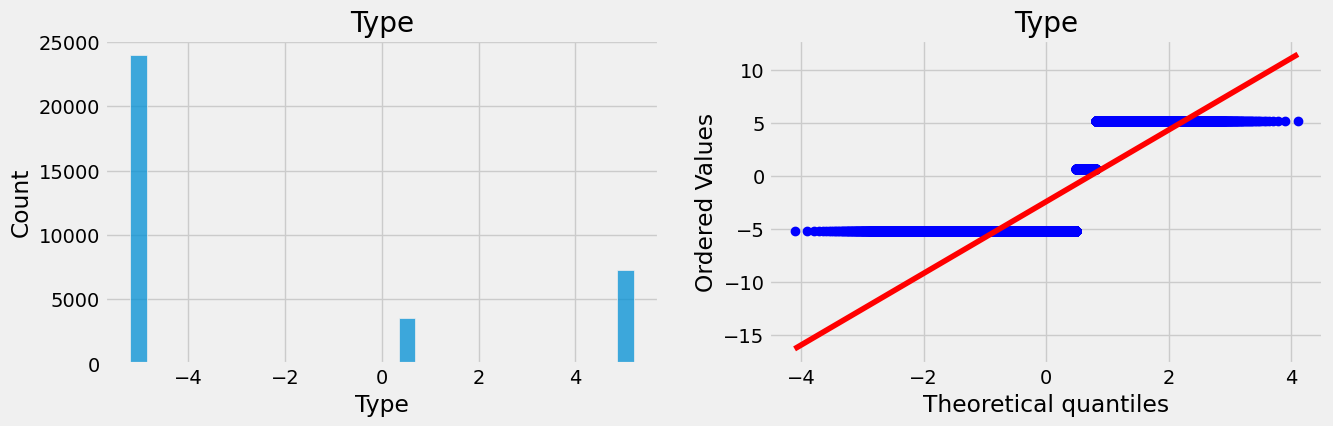

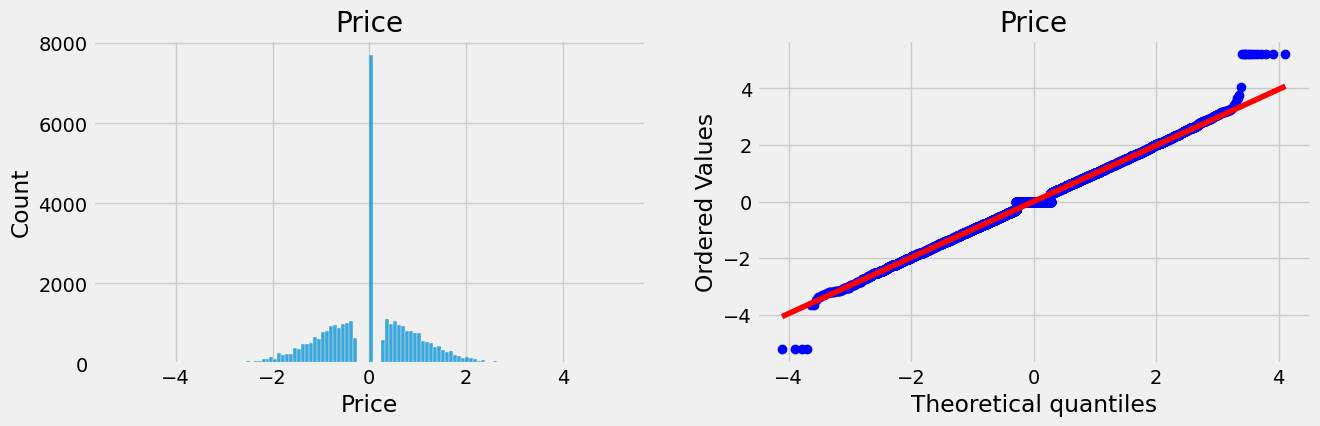

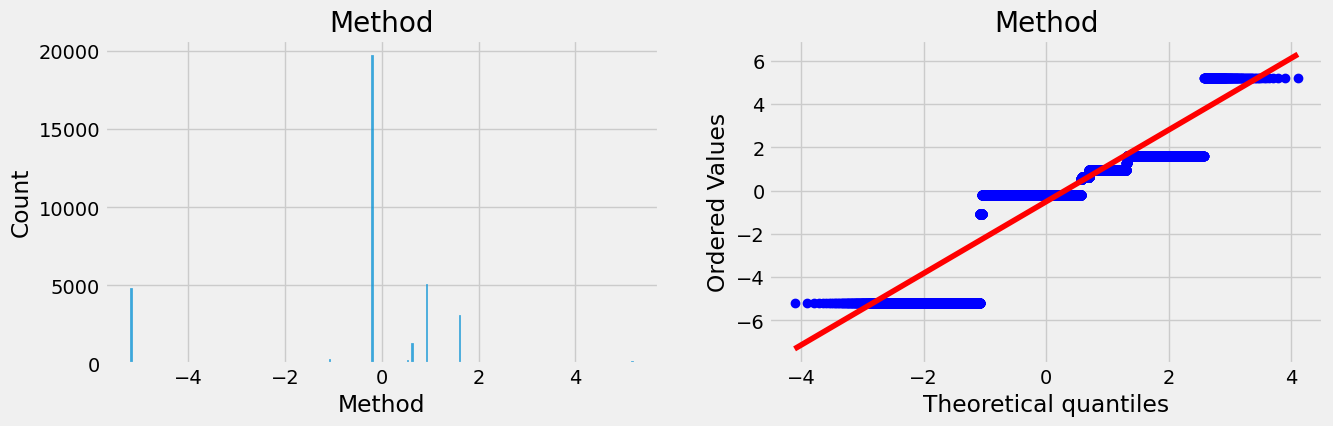

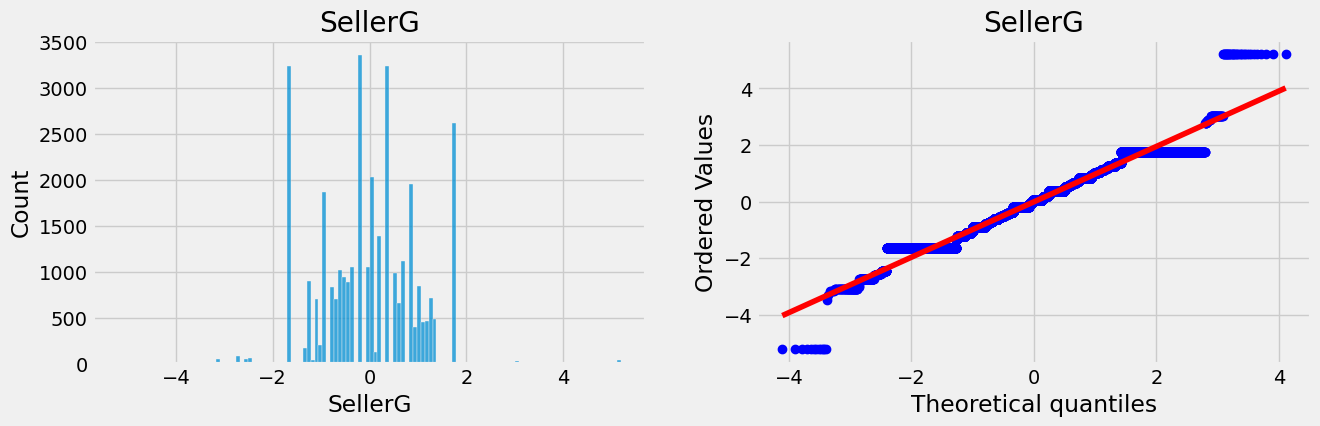

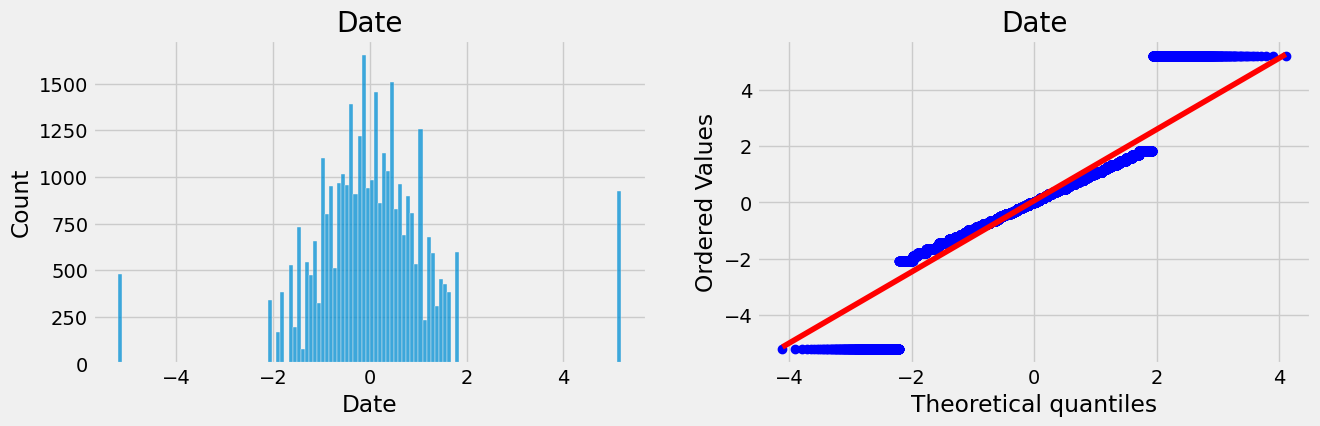

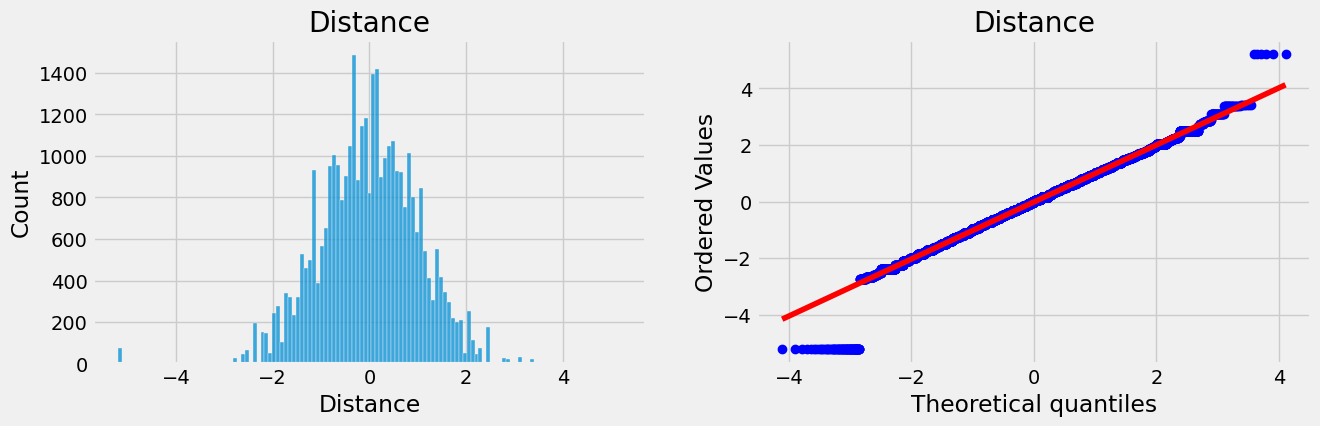

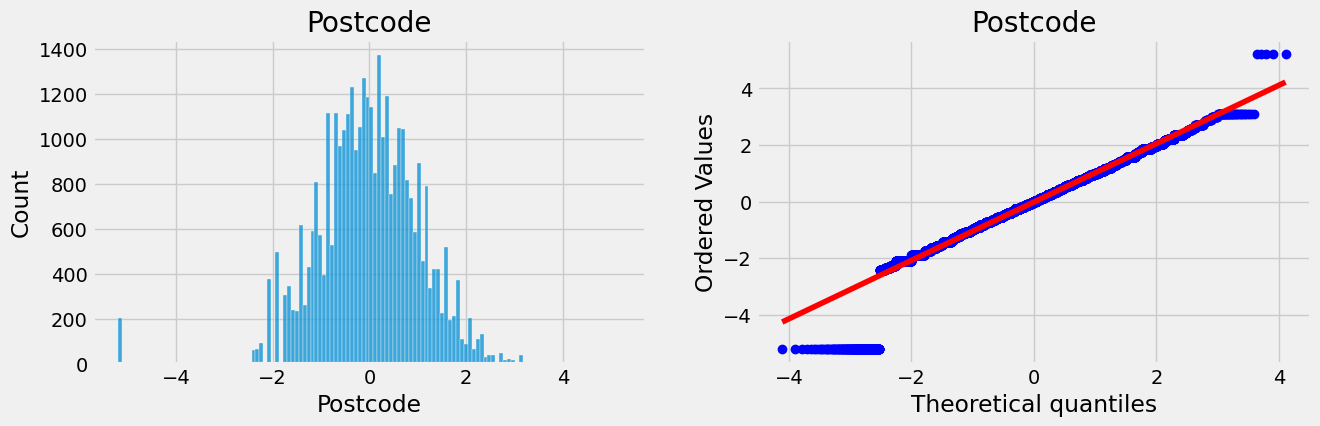

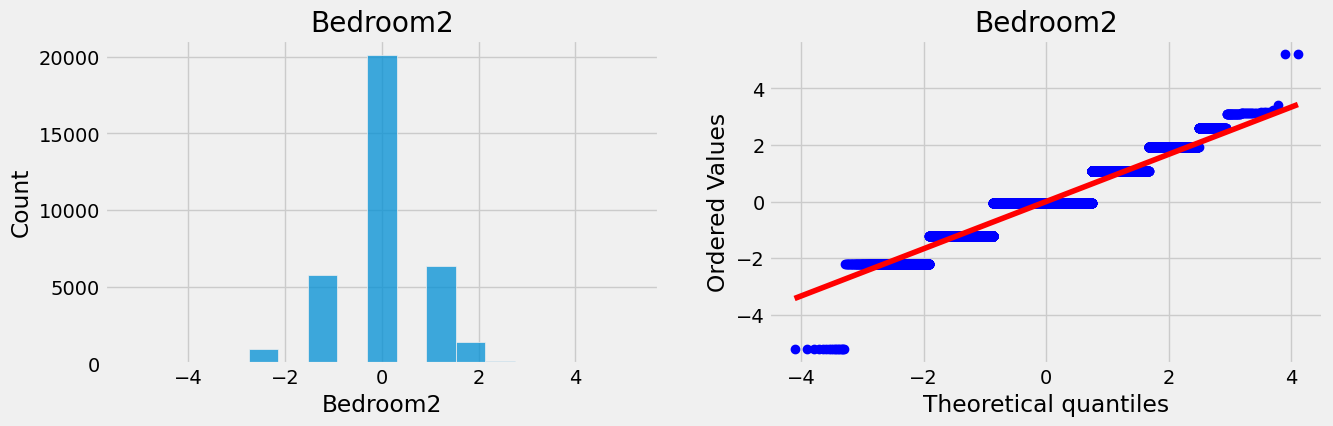

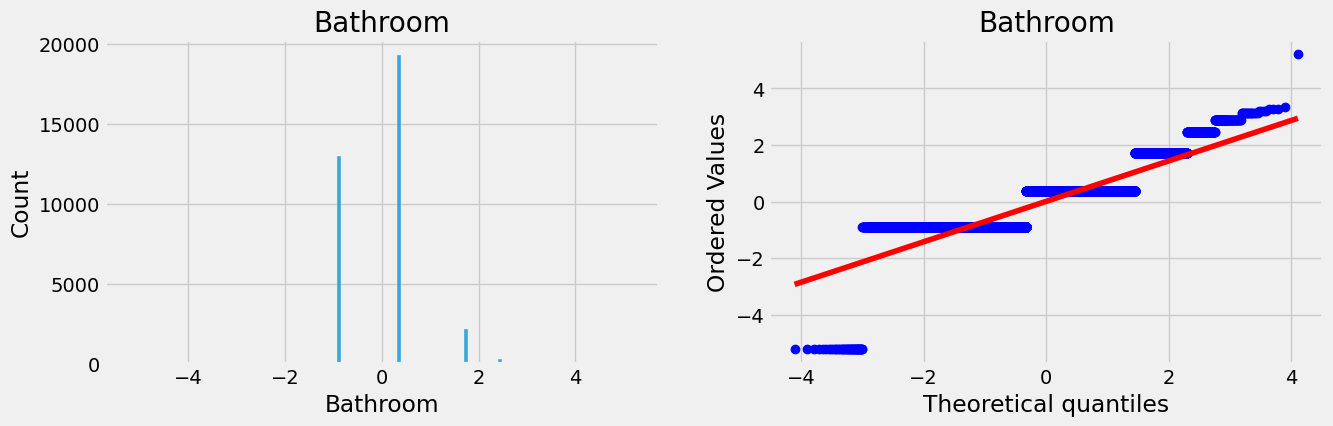

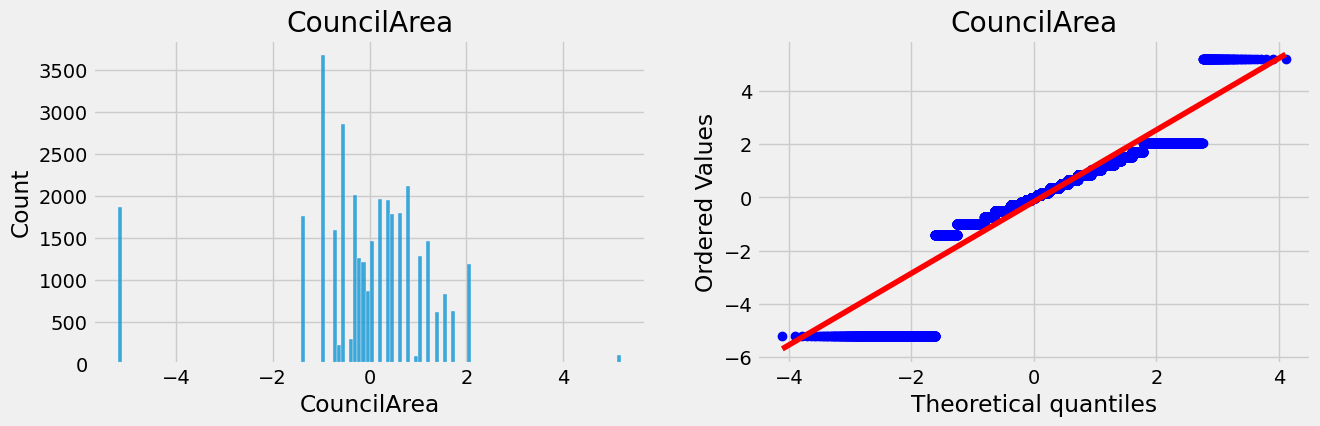

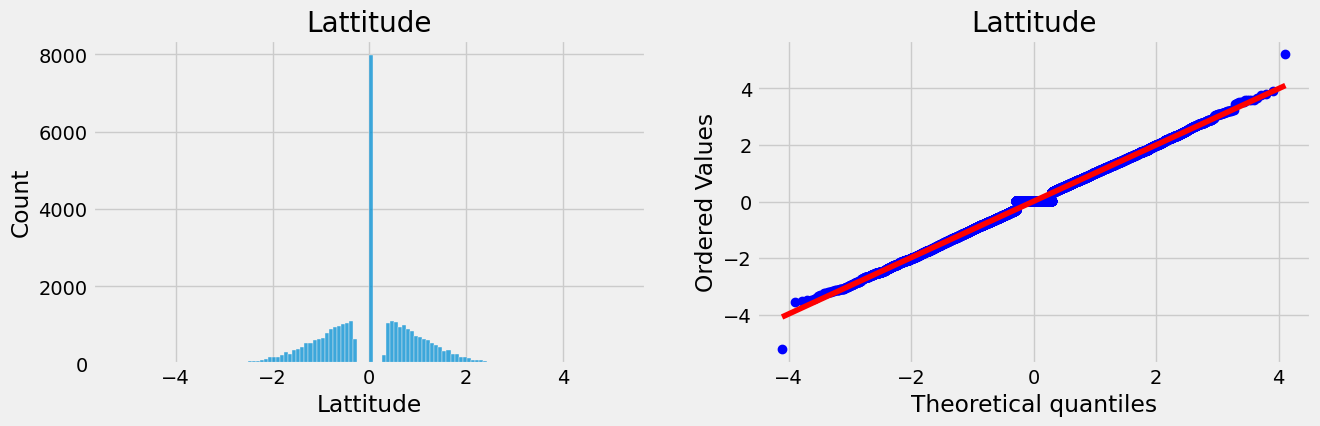

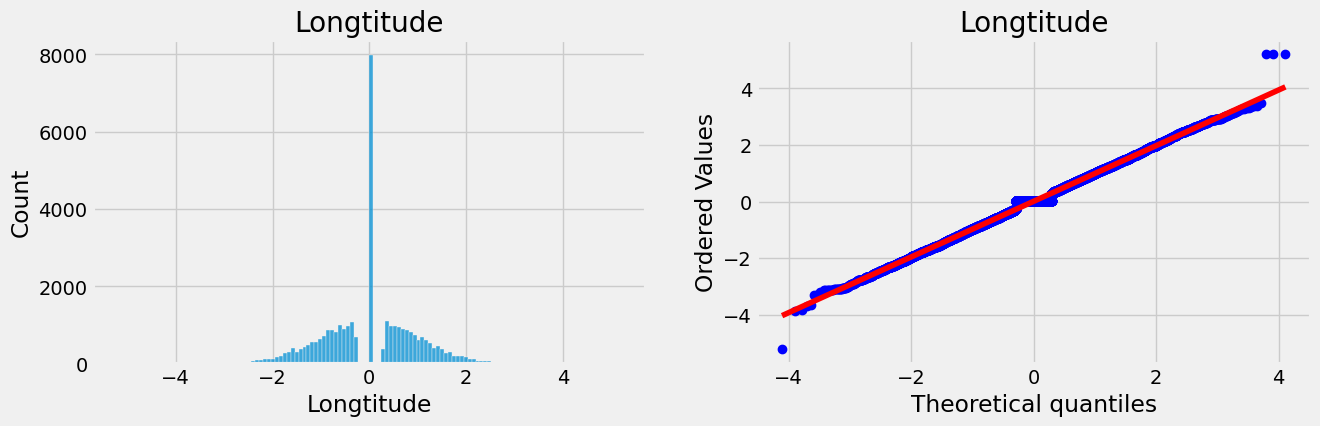

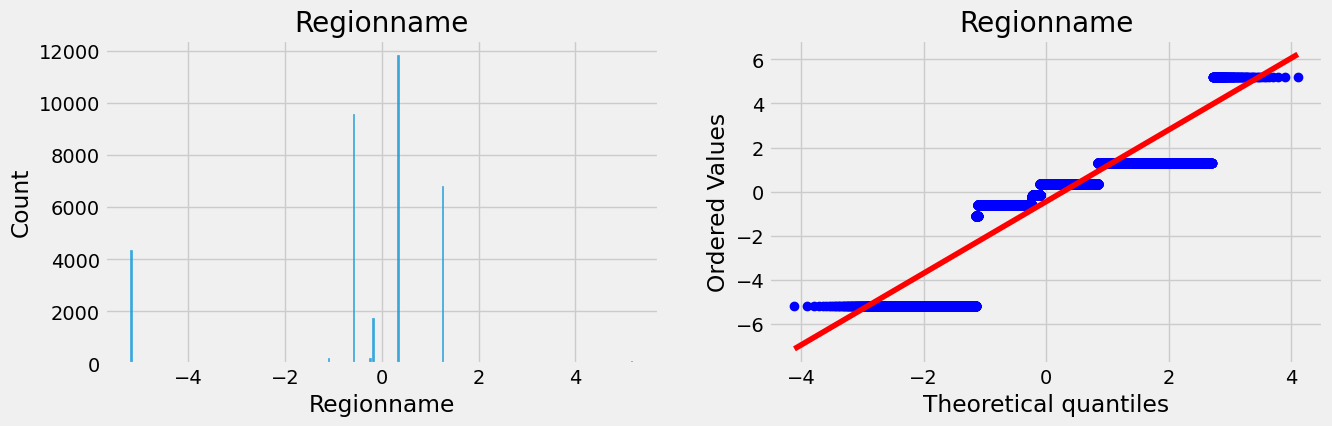

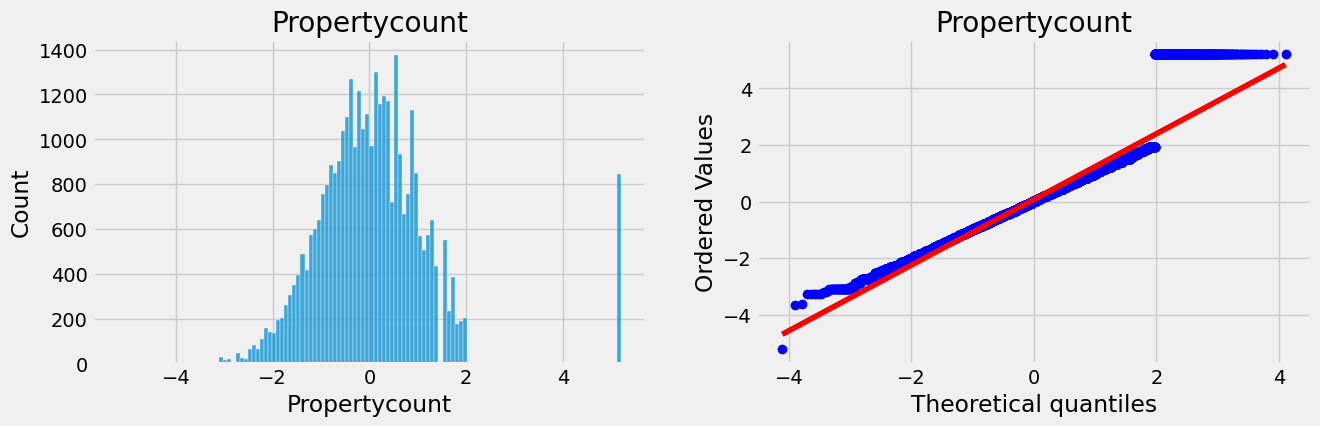

In [118]:
for column in df.columns :
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(df[column])
    plt.title(column)

    plt.subplot(122)
    stats.probplot(df[column],dist = 'norm', plot = plt)
    plt.title(column)
    plt.show()

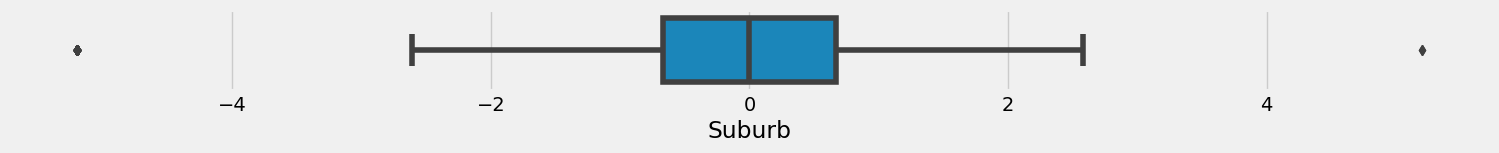

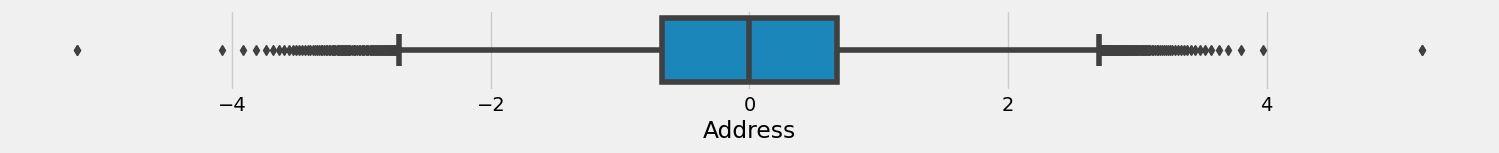

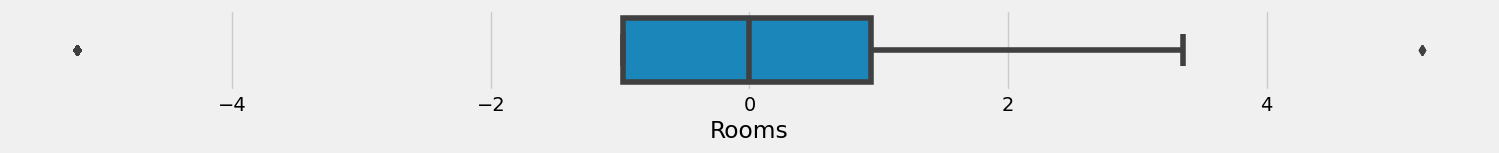

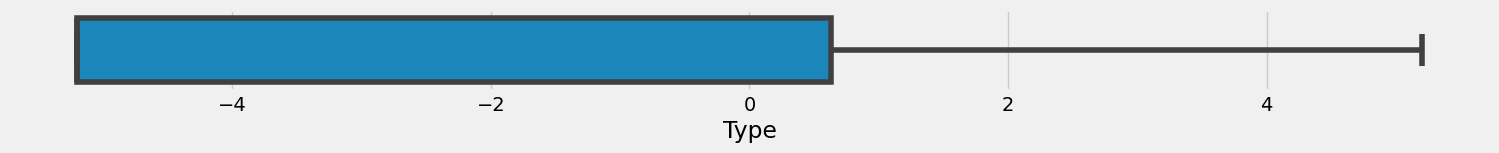

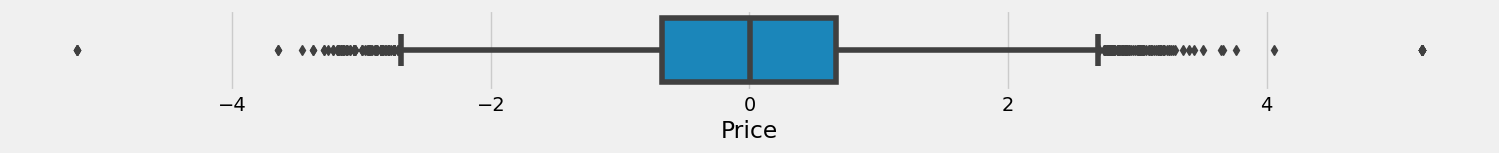

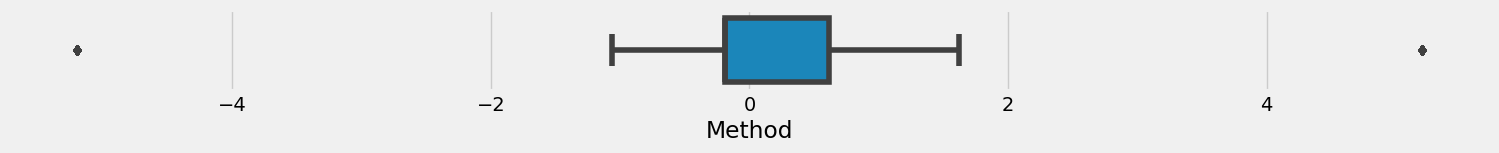

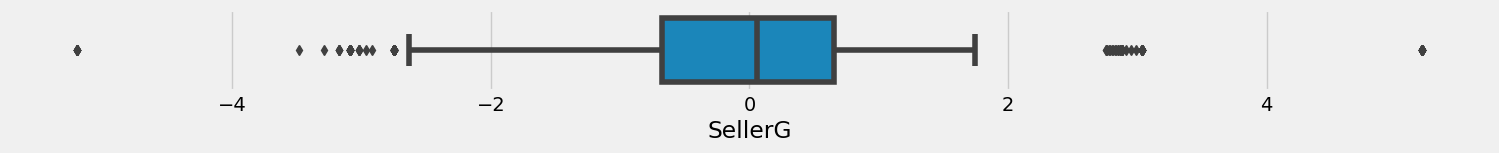

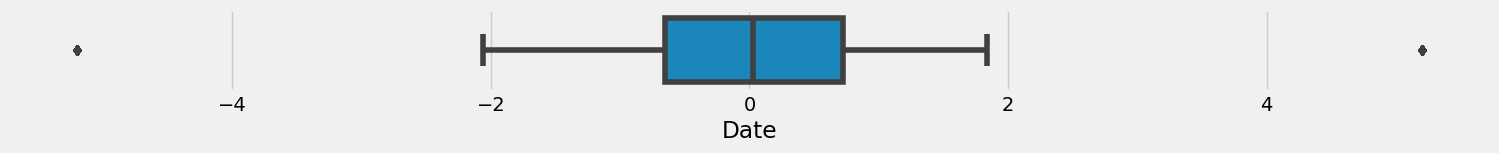

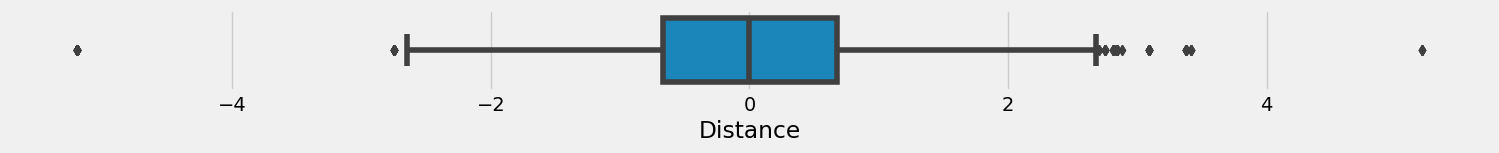

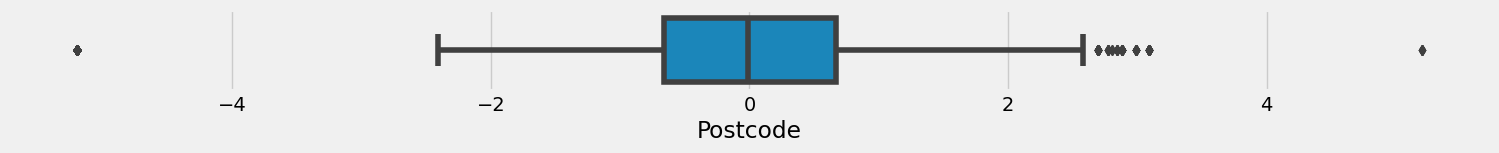

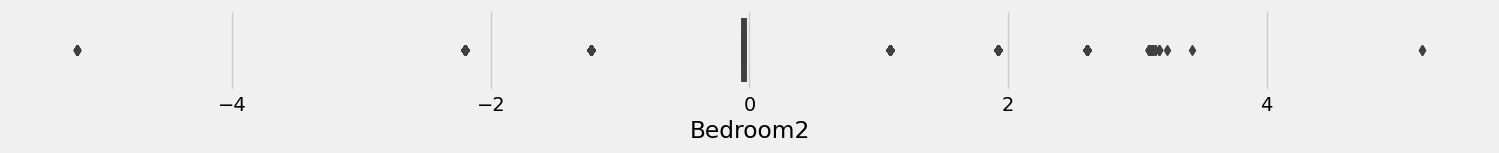

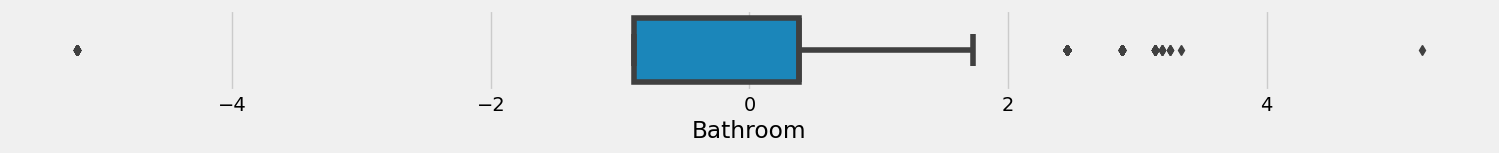

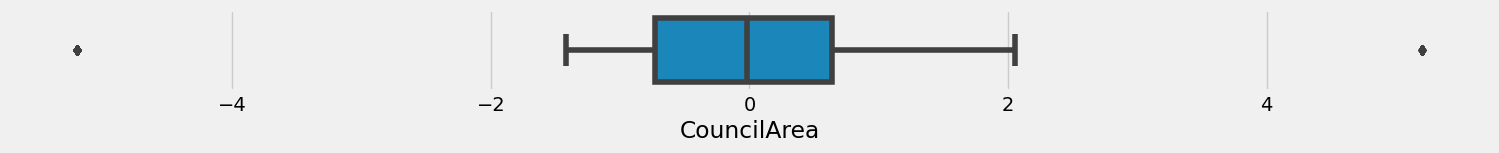

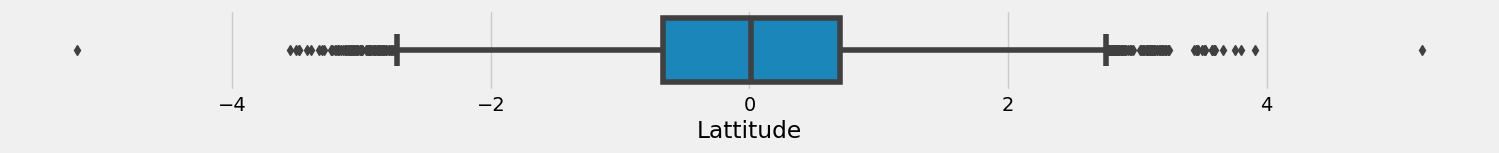

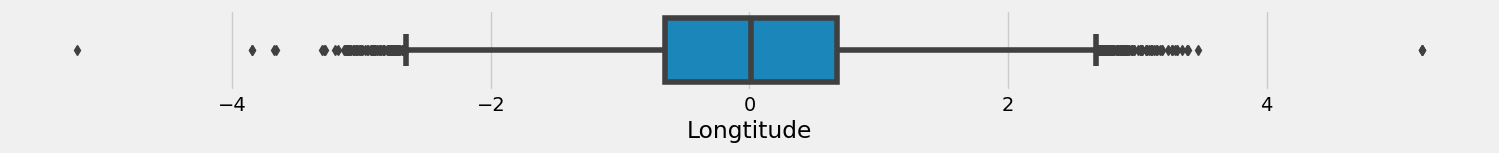

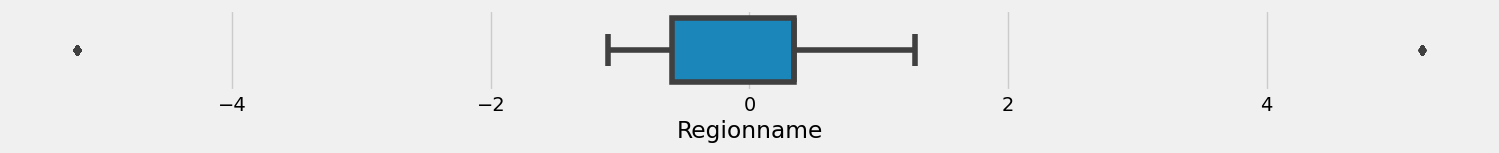

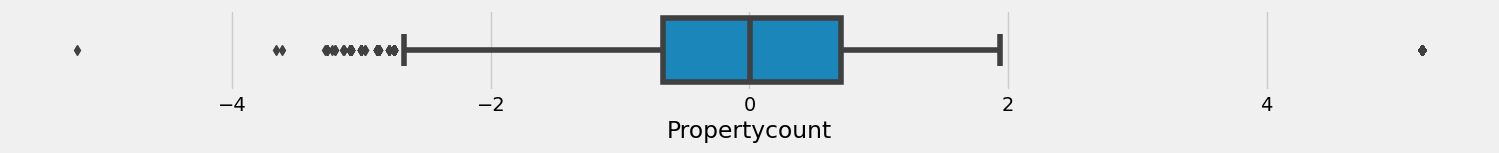

In [120]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df, x = column)

In [121]:
df.drop(["Bedroom2", "Type"], axis = 1, inplace = True)
df.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,-5.199338,1.107088,-0.977487,0.002509,1.283687,-0.205941,0.766391,-1.786156,-0.430727,-0.892038,2.053336,0.373895,-0.401490,-0.596935,-0.746351
1,-5.199338,1.707781,-0.977487,1.084195,-0.188033,-1.220640,0.866189,-1.786156,-0.430727,-0.892038,2.053336,0.388268,-0.374510,-0.596935,-0.746351
2,-5.199338,-0.120653,-0.977487,0.546700,-0.188033,-1.220640,0.922330,-1.786156,-0.430727,-0.892038,2.053336,-0.290611,-0.423003,-0.596935,-0.746351
3,-5.199338,-0.564521,-0.005018,0.002509,1.620592,0.955874,0.922330,-1.786156,-0.430727,0.383024,2.053336,-0.317679,0.332640,-0.596935,-0.746351
4,-5.199338,0.643502,-0.005018,1.068256,0.933910,-1.220640,0.955471,-1.786156,-0.430727,0.383024,2.053336,-0.303539,-0.414267,-0.596935,-0.746351


In [123]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tabulate import tabulate

In [124]:
X = df.drop("Price", axis = 1)
Y = df["Price"]

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [126]:
regLR = LinearRegression()
regLR.fit(X_train,Y_train)
yPredRegLR=regLR.predict(X_test)
mean_squared_error(yPredRegLR, Y_test)

0.5774174144038985

In [127]:
regSVR=SVR(kernel='linear')
regSVR.fit(X_train,Y_train)
yPredRegSVR=regSVR.predict(X_test)
mean_squared_error(yPredRegSVR, Y_test)

0.5847785112333835

In [128]:
regDTR=DecisionTreeRegressor()
regDTR.fit(X_train,Y_train)
yPredRegDTR=regDTR.predict(X_test)
mean_squared_error(yPredRegDTR, Y_test)

0.7993871530018315

In [129]:
regRFR=RandomForestRegressor()
regRFR.fit(X_train,Y_train)
yPredRegRFR=regRFR.predict(X_test)
mean_squared_error(yPredRegRFR, Y_test)

0.4135704277102868

In [130]:
data=[
     ["Linear Regression",round(mean_absolute_error(yPredRegLR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegLR, Y_test)),2),round(r2_score(yPredRegLR, Y_test),2)],
     ["Support Vector Regression",round(mean_absolute_error(yPredRegSVR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegSVR, Y_test)),2),round(r2_score(yPredRegSVR, Y_test),2)],
     ["Decision Tree Regression",round(mean_absolute_error(yPredRegDTR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegDTR, Y_test)),2),round(r2_score(yPredRegDTR, Y_test),2)],
     ["Random Forest Regression",round(mean_absolute_error(yPredRegRFR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegRFR, Y_test)),2),round(r2_score(yPredRegRFR, Y_test),2)]
    ]
columns=["Model Name","Mean Absolute Error","Root Mean Squared Error","R Squared Error"]

print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════╤═══════════════════════╤═══════════════════════════╤═══════════════════╕
│ Model Name                │   Mean Absolute Error │   Root Mean Squared Error │   R Squared Error │
╞═══════════════════════════╪═══════════════════════╪═══════════════════════════╪═══════════════════╡
│ Linear Regression         │                  0.62 │                      0.76 │             -0.42 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Support Vector Regression │                  0.61 │                      0.76 │             -0.16 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Decision Tree Regression  │                  0.65 │                      0.89 │              0.21 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Random Forest Regression  │                  0.49 │                      0.64 │ 

In [131]:
results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': yPredRegDTR})

results_df.head(10)

,Actual Values,Predicted Values
0,0.555462,0.910873
1,0.002509,-0.506348
2,0.002509,0.488741
3,0.002509,-2.013671
4,0.002509,-0.283522
5,-1.421556,0.002509
6,0.900065,-1.410933
7,1.242061,1.204935
8,0.555462,0.921337
9,0.527294,1.069251


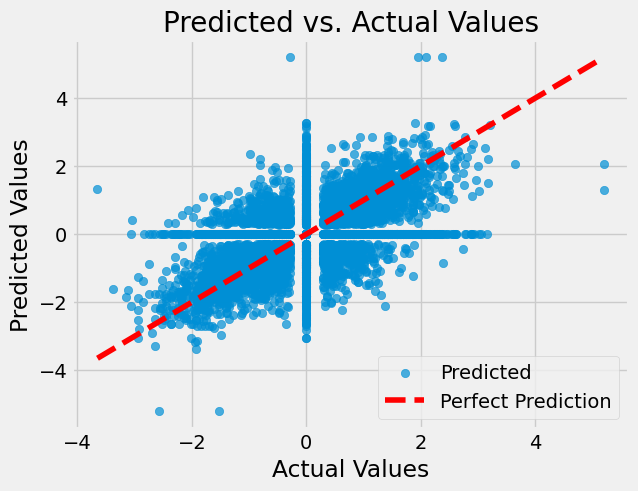

In [132]:
plt.scatter(Y_test, yPredRegDTR, alpha=0.7, label='Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()